## This notebook makes the plots for the Allen Connectivity Dataset analysis part of Figure S4

In [1]:
#packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import imageio

##ATTENTION: Change this line to wherever you have cloned the ccf repository
sys.path.insert(0, 'C:\\Users\\egeaa\\Documents\\GitHub\ccf_streamlines\\') 
import ccf_streamlines.projection as ccfproj

from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from allensdk.core.reference_space_cache import ReferenceSpaceCache
from pathlib import Path

#import methods
from FigureS4_AllenDataAnalysis_methods import *
from analysis_utils import *

In [2]:
#IMPORTANT!!!! 
#Change this path to the data folder path in your system
ops = {} 
ops['dataPath'] = os.path.join('Z:', 'home', 'shared', 'Alex_analysis_camp', 'data_axonsPaper')

### Define variables for future use

In [3]:
ops['outputPath'] = os.path.join(ops['dataPath'],'analysisOutputs')
ops['areas'] = ['V1','P','POR','LI', 'LM', 'AL','RL','A','AM', 'PM']
ops['mm'] = 0.0393701
ops['myColorsDict'] = {'HVA_colors' : {'V1': '#4A443F', 
                        'POR': '#FF8623', #4C9E57
                        'P': '#FFB845', #AAC255
                        'LI': '#F5501E', #79B855            
                        'LM' : '#EB7C6C',
                        'AL' : '#DB839F',                
                        'RL' : '#BB83DB',
                        'A': '#8172F0',
                        'AM': '#4062F0',
                        'PM': '#6CBEFF',                                                  
                        'OUT': 'lightgray',
                        'ventral': '#FF8623',
                        'dorsal': '#4062F0',
                        'dorso-ventral': '#A161A4'}} #FF8606
ops['dorsal'] = ['AM', 'PM', 'A', 'RL'] 
ops['ventral'] = ['P', 'POR', 'LI', 'LM', 'AL']  
ops['groups'] = ['V1', 'Ventral', 'Dorsal'] 
ops['colors_groups'] = ['#4A443F',ops['myColorsDict']['HVA_colors']['POR'],ops['myColorsDict']['HVA_colors']['AM']] 
ops['color_motor'] = '#FF9D00'
ops['color_stim'] = '#1368F0'
ops['color_full'] = '#C90700'
ops['color_stimSub'] =  '#BF65C9' 
ops['color_motorSub'] = '#008D36'

ops['azimuths'] = ['-108','-90','-72','-54','-36','-18','0','18','36','54','72','90','108']
ops['freq_names'] = ['2', '4', '8', '16', '32', '64']

ops['ref'] = imageio.imread(os.path.join(ops['dataPath'] ,'reference_maps','ReferenceMap_allen_black_nice.png'))
ops['ref2'] = imageio.imread(os.path.join(ops['dataPath'] ,'reference_maps','ReferenceMap_allen_black_nice_uncropped.png'))
ops['map_V1'] = imageio.imread(os.path.join(ops['dataPath'],'reference_maps','Reference_map_allen_V1Marked.png'))
map_colors = imageio.imread(os.path.join(ops['dataPath'],'reference_maps','Reference_map_allen_colors.png'))
ops['map_colors'] = map_colors[:,:,0:3]
ops['colors_LUT'] = np.load(os.path.join(ops['dataPath'],'reference_maps','colorMap_LUT_allen.npy'), allow_pickle = True).item()
       
groups = np.load(os.path.join(ops['dataPath'],'injectionPosition_groups.npy'), allow_pickle=True).item()
ops['ventralAnimals'] = groups['ventralAnimals']
ops['dorsalAnimals'] = groups['dorsalAnimals']
ops['posteriorAnimals'] = groups['posteriorAnimals']
ops['anteriorAnimals'] = groups['anteriorAnimals']

In [4]:
##ATTENTION: Change this line to wherever you have cloned the ccf repository
sys.path.insert(0, 'C:\\Users\\egeaa\\Documents\\GitHub\ccf_streamlines\\') 
import ccf_streamlines.projection as ccfproj

from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from allensdk.core.reference_space_cache import ReferenceSpaceCache
from pathlib import Path

#useful
#https://allensdk.readthedocs.io/en/stable/_static/examples/nb/mouse_connectivity.html
outputPath = os.path.join(ops['dataPath'], 'Allen_connectivity_analysis')

#get df with all experiments
mcc = MouseConnectivityCache(manifest_file=Path(outputPath) / 'manifest.json')
rsp = mcc.get_reference_space()
structure_tree = mcc.get_structure_tree()
all_experiments = mcc.get_experiments(dataframe=True)

idx =[]
for i in range(len(all_experiments)):
    if 'AUD'in all_experiments['structure_abbrev'].iloc[i]:
        idx.append(i)

Ac_exp = all_experiments.iloc[np.array(idx)] #dataframe with all experiments that contain auditory cortex as part of the injection site

In [5]:
final_ids = [100149109, 116903230,120491896,146858006, 184159706,182090318,569994739,112881858,287223629]#criteria for choosing these can be found in manuscript methods

idx = np.array([np.nonzero(np.array(Ac_exp['id']) == final_ids[j])[0] for j in range(len(final_ids))])
df = Ac_exp.iloc[np.squeeze(idx)]

target_areas = ['VISp','VISpl', 'VISpor','VISli', 'VISl', 'VISal', 'VISrl','VISa', 'VISam', 'VISpm']

#get projection intensity to each visual area for each experiment. Takes a while
intensity_byArea_all = getProjectionIntensity(final_ids, df,ops,mcc,rsp,structure_tree, Ac_exp, target_areas)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:11<00:00, 14.63s/it]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:17<00:00,  1.79s/it]


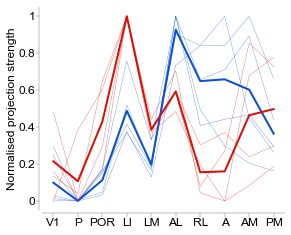

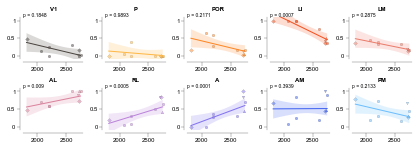

In [6]:
#PLot the projection strength for each area, grouping experiments in to anterior and posterior, or as a function of A-P position
plotProjectionStrength(df,intensity_byArea_all, ops, target_areas)

loading path information


100%|██████████████████████████████████████████████████████████████████████████████| 1016/1016 [00:13<00:00, 75.04it/s]


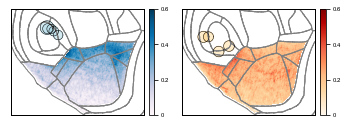

In [7]:
#PLot averaged projection intensity on cortical map, grouped by AP position
plotProjectionIntensity_onCortex(df, ops, final_ids)